In [368]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
from matplotlib import pyplot as plt

In [369]:
sns.set()

<h3>[Problem 1] Data acquisition<h3>

In [370]:
data = load_iris()
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [371]:
X = pd.DataFrame({
        'sepal_length': data['data'][:, 0], 
        'sepal_width': data['data'][:, 1], 
        'petal_length': data['data'][:, 2], 
        'petal_width': data['data'][:, 3]
        })
        
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [372]:
y = pd.DataFrame({
        'Species': data['target']
        })

y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


<h3>[Problem 2] Combining data<h3>

In [373]:
df = pd.concat([X, y], axis = 1)

df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<h3>[Problem 3] Checking the data<h3>

In [374]:
sample = df.iloc[3]

print(sample)
print("\nsepal_length type: {}".format(type(sample['sepal_length'])))
print("sepal_width type: {}".format(type(sample['sepal_width'])))
print("petal_length type: {}".format(type(sample['petal_length'])))
print("petal_width type: {}".format(type(sample['petal_width'])))

sepal_length    4.6
sepal_width     3.1
petal_length    1.5
petal_width     0.2
Species         0.0
Name: 3, dtype: float64

sepal_length type: <class 'numpy.float64'>
sepal_width type: <class 'numpy.float64'>
petal_length type: <class 'numpy.float64'>
petal_width type: <class 'numpy.float64'>


In [375]:
counts = df['Species'].value_counts()

print(counts)
print("\nSpecies 0: {} samples".format(counts.loc[0]))
print("Species 1: {} samples".format(counts.loc[1]))
print("Species 2: {} samples".format(counts.loc[2]))

2    50
1    50
0    50
Name: Species, dtype: int64

Species 0: 50 samples
Species 1: 50 samples
Species 2: 50 samples


In [376]:
print("Missing value: ")
df.isnull().sum()

Missing value: 


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

In [377]:
df.loc[:, 'sepal_length':'petal_width'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<h3>[Problem 4] Examining the iris dataset itself<h3>

In [378]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

<h3>[Problem 5] Extracting the required data<h3>

<h4>Extract sepal_width, columns in three different ways<h4>

In [379]:
print("First way")
df['sepal_width']

First way


0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [380]:
print("Second way")
df.loc[:, 'sepal_width']

Second way


0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [381]:
print("Third way")
df.iloc[:, 1]

Third way


0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

<h4>Extract the 50th to 99th data<h4>

Assume the first data is at index 0

In [382]:
df.loc[49:98, :]

,sepal_length,sepal_width,petal_length,petal_width,Species
49,5.0,3.3,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1


<h4>Extract the 50th to 99th data of the petal_length column<h4>

In [383]:
df.loc[49:98, 'petal_length']

49    1.4
50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
Name: petal_length, dtype: float64

<h4>Extract data with a petal_width value of 0.2​<h4>

In [384]:
df[df['petal_width'] == 0.2]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


loc: locate a piece of data by using names or labels<br>
iloc: locate a piece of data by using integer index number

<h3>[Problem 6] Creating a diagram<h3>

<h4>Make a pie chart of the number of samples per label (while showing percentages)<h4>

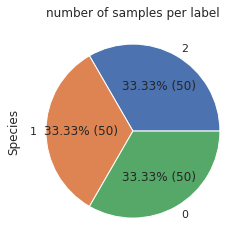

In [385]:
df['Species'].value_counts().plot.pie(
                title= "number of samples per label", 
                autopct=lambda p: "{:.2f}% ({:.0f})".format(p, (p / 100) * df['Species'].sum())
            )

The pie chart shows 3 equal pieces of number of samples per label, which indicate the size of 3 kind of flower is the same.

<h4>Select features one by one and visualize the distribution of data for each label using a box plot<h4>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12c9a20c40>,
      dtype=object)

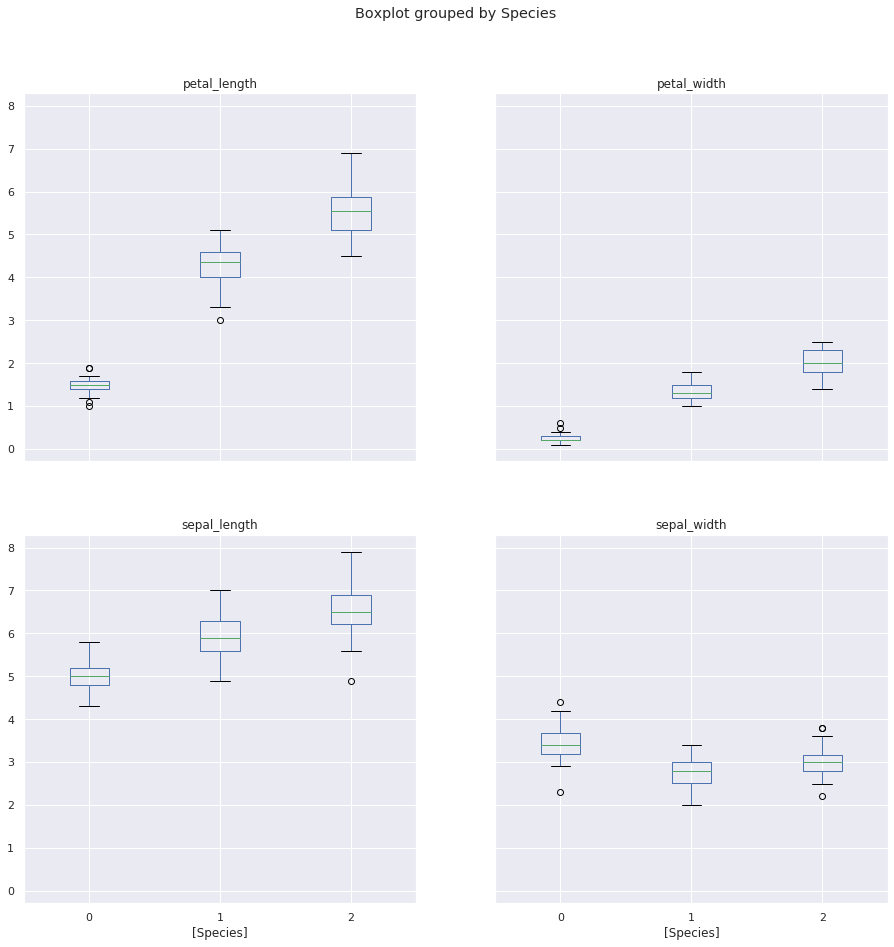

In [386]:
df.boxplot(by='Species', figsize=(15,15))

In the box plot above, we can see the petal length, petal width, sepal length of species 2 is highest (variate from 4.5 to nearly 7 cm, from 1.5 to 2.5 cm, from 5.5 to nearly 8 cm, respectively) in general whereas those value is lowest for species 0 (variate from 1 to nearly 2 cm, from over 0 to over 1.5 cm, from 4.2 to 5.8 cm, respectively). The sepal width of species 0 is highest, whereas species 1 is lowest. <br><br>
The variation of petal length, petal width, sepal length of species 2 are also highest, wheareas the variation of sepal width of species 2 is lowest.

<h4>Select features one by one and visualize the distribution of data for each label using a violin plot<h4>

Text(0.5, 1.0, 'sepal_width')

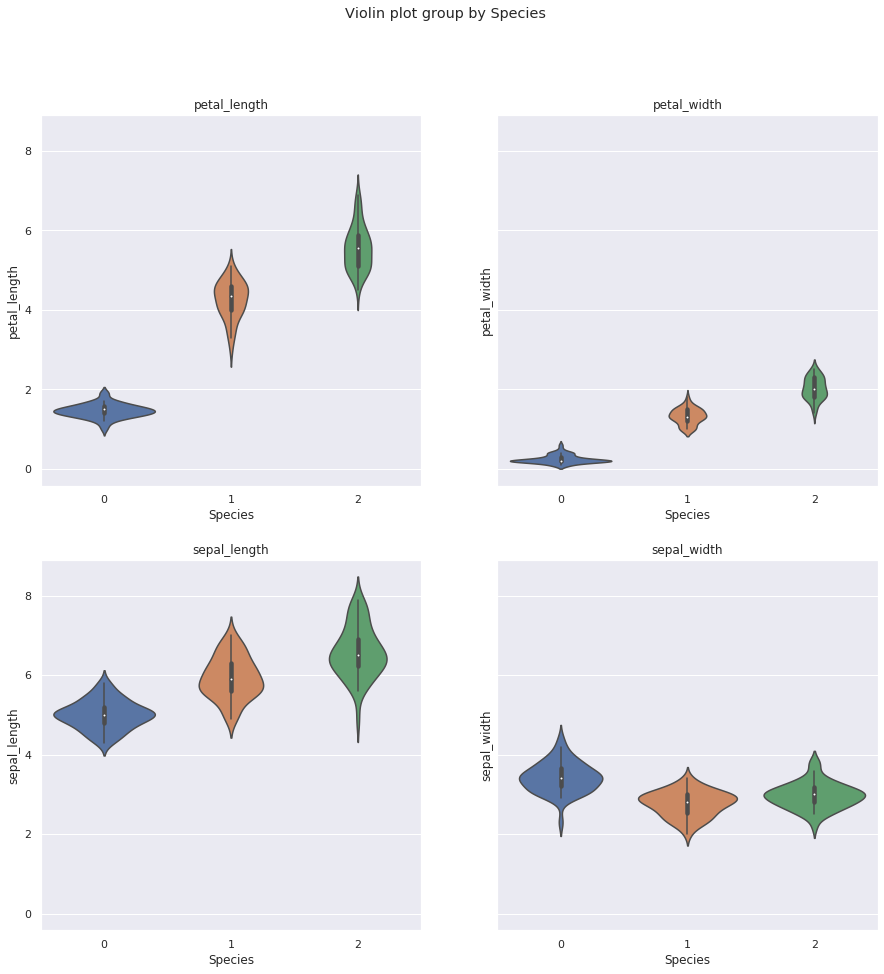

In [387]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
fig.suptitle('Violin plot group by Species')

sns.violinplot(data=df, x = 'Species', y = 'petal_length', ax = axes[0, 0])
axes[0, 0].set_title('petal_length')

sns.violinplot(data=df, x = 'Species', y = 'petal_width', ax = axes[0, 1])
axes[0, 1].set_title('petal_width')

sns.violinplot(data=df, x = 'Species', y = 'sepal_length', ax = axes[1, 0])
axes[1, 0].set_title('sepal_length')

sns.violinplot(data=df, x = 'Species', y = 'sepal_width', ax = axes[1, 1])
axes[1, 1].set_title('sepal_width')

In the violin plot above, we can see the highest distributions of each features lies around the median.

Similar: showing min, max, quartiles, interquartile range, median, outliers <br>
Difference: Violin plot has an additionally feature over box plot which is showing distribution of a variables

<h3>[Problem 7] Confirming the relationship between features<h3>

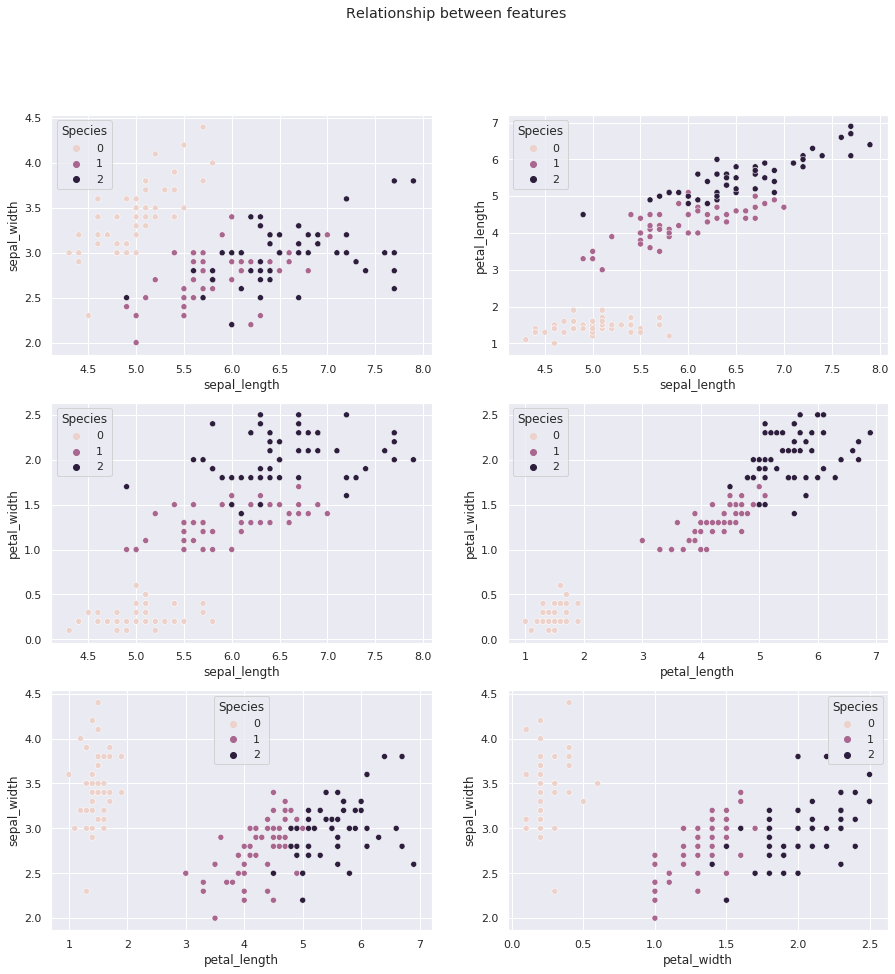

In [388]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Relationship between features')

sns.scatterplot(data=df, x=df['sepal_length'], y=df['sepal_width'], ax=axes[0, 0], hue='Species')
sns.scatterplot(data=df, x=df['sepal_length'], y=df['petal_length'], ax=axes[0, 1], hue='Species')
sns.scatterplot(data=df, x=df['sepal_length'], y=df['petal_width'], ax=axes[1, 0], hue='Species')
sns.scatterplot(data=df, x=df['petal_length'], y=df['petal_width'], ax=axes[1, 1], hue='Species')
sns.scatterplot(data=df, x=df['petal_length'], y=df['sepal_width'], ax=axes[2, 0], hue='Species')
sns.scatterplot(data=df, x=df['petal_width'], y=df['sepal_width'], ax=axes[2, 1], hue='Species')

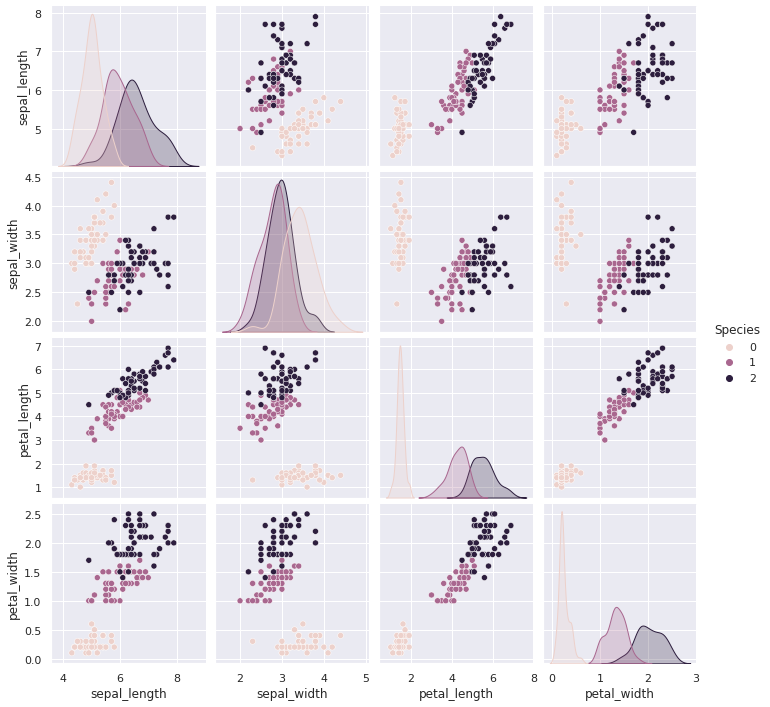

In [389]:
sns.pairplot(df, hue = 'Species')

In the scatter plot matrix above, we also see most of species 0 samples have the smallest petal length, sepal length and petal width, and cluster apart from other species.

In [394]:
print("Correlation matrix")
corr = df.iloc[:, 0:4].corr()
corr

Correlation matrix


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


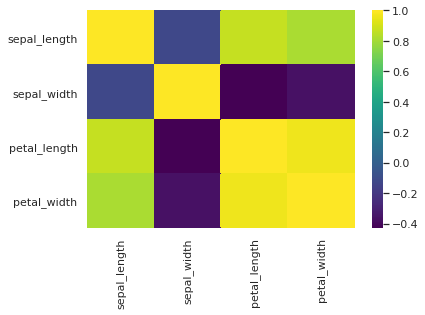

In [401]:
sns.heatmap(corr, cmap="viridis")

In the scatter plot matrix, table and heat map of correlation above, we can see the strong dependency between:<br>
 - petal width and petal length (0.962865), the longer the petal length, the longer the petal width
 - petal length and sepal length (0.871754), the longer the petal length, the longer the sepal length
 - petal width and sepal length (0.817941), the longer the petal width, the longer the sepal length

<h3>[Problem 8] Explaining the results of visualized graphs and tables<h3>

The explaination is attached to each graph above